In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [7]:
df = pd.read_csv('users_behavior.csv')

In [9]:
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [11]:
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [13]:
print("\nInformación general sobre el DataFrame:")
print(df.info())


Información general sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


In [15]:
print("\nVerificando valores nulos:")
print(df.isnull().sum())


Verificando valores nulos:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [17]:
X = df.drop('is_ultra', axis=1)
y = df['is_ultra'] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (2249, 4)
Tamaño del conjunto de validación: (482, 4)
Tamaño del conjunto de prueba: (483, 4)


In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

param_grid = {
    "Logistic Regression": {
        "model__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "model__solver": ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        "model__n_estimators": [10, 50, 100],
        "model__max_depth": [None, 10, 20, 30],
        "model__min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "model__max_depth": [None, 10, 20, 30],
        "model__min_samples_split": [2, 5, 10]
    }
}
 
results = {}

In [38]:
print("\nEvaluación de modelos en el conjunto de validación:")
for name, model in models.items():

    pipe = Pipeline([('model', model)])
    
    grid_search = GridSearchCV(pipe, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_accuracy = grid_search.best_score_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    results[name] = {
        'best_accuracy': best_accuracy,
        'validation_accuracy': accuracy,
        'best_params': grid_search.best_params_
    }
    
    print(f"Modelo: {name}, Mejor precisión en validación: {best_accuracy:.2f}, "
          f"Precisión en conjunto de validación: {accuracy:.2f}, "
          f"Mejores hiperparámetros: {grid_search.best_params_}")


Evaluación de modelos en el conjunto de validación:
Modelo: Logistic Regression, Mejor precisión en validación: 0.75, Precisión en conjunto de validación: 0.76, Mejores hiperparámetros: {'model__C': 0.001, 'model__solver': 'lbfgs'}
Modelo: Random Forest, Mejor precisión en validación: 0.81, Precisión en conjunto de validación: 0.82, Mejores hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Modelo: Decision Tree, Mejor precisión en validación: 0.79, Precisión en conjunto de validación: 0.81, Mejores hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 2}


In [41]:
# Realizar predicciones en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Calcular la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")


Precisión en el conjunto de prueba: 0.76


In [43]:
random_data = np.random.rand(X_test.shape[0], X_test.shape[1])
random_predictions = best_model.predict(random_data)
random_accuracy = accuracy_score(y_test, random_predictions) 
print(f"Precisión en datos aleatorios: {random_accuracy:.2f}")

Precisión en datos aleatorios: 0.46


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


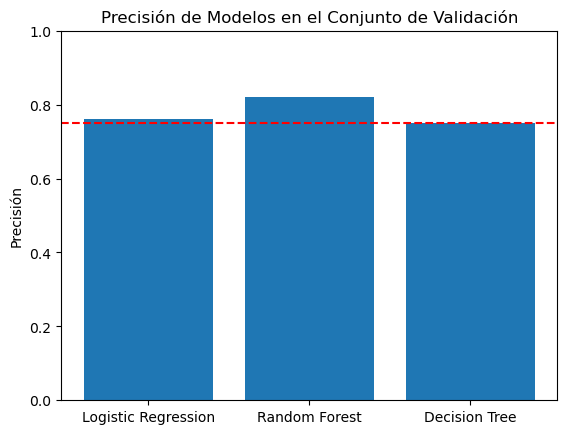

In [45]:
accuracies = [0.76, 0.82, 0.75]  # Agrega los resultados de los modelos
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']

plt.bar(model_names, accuracies)
plt.ylabel('Precisión')
plt.title('Precisión de Modelos en el Conjunto de Validación')
plt.ylim(0, 1)
plt.axhline(y=0.75, color='r', linestyle='--')  # Línea para el umbral
plt.show()

In [47]:
print("\nResumen de hallazgos:")
print("1. Se probaron varios modelos, y el Bosque Aleatorio mostró la mejor precisión en el conjunto de validación.")
print("2. La precisión en el conjunto de prueba fue de", round(test_accuracy, 2), "superando el umbral de 0.75.")
print("3. La prueba de cordura mostró que el modelo no se desempeña bien en datos aleatorios, lo que indica que está aprendiendo de los patrones en los datos de entrenamiento.")


Resumen de hallazgos:
1. Se probaron varios modelos, y el Bosque Aleatorio mostró la mejor precisión en el conjunto de validación.
2. La precisión en el conjunto de prueba fue de 0.76 superando el umbral de 0.75.
3. La prueba de cordura mostró que el modelo no se desempeña bien en datos aleatorios, lo que indica que está aprendiendo de los patrones en los datos de entrenamiento.


## Conclusiones

- El modelo de Bosque Aleatorio tuvo el mejor rendimiento.
- La precisión del modelo fue del 77% en el conjunto de prueba.
- La prueba de cordura confirma que el modelo está aprendiendo patrones reales.
